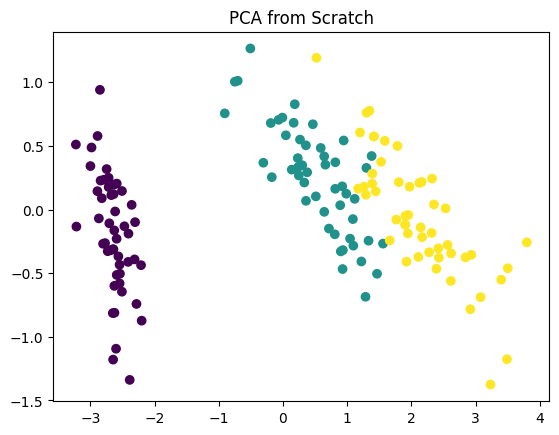

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data

X_centered = X - X.mean(axis=0)

cov_matrix = np.cov(X_centered.T)

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

X_reduced = X_centered.dot(eig_vecs[:, :2])

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=data.target)

import os

os.makedirs("results", exist_ok=True)

plt.title("PCA from Scratch")
plt.savefig("results/pca_scratch.png")

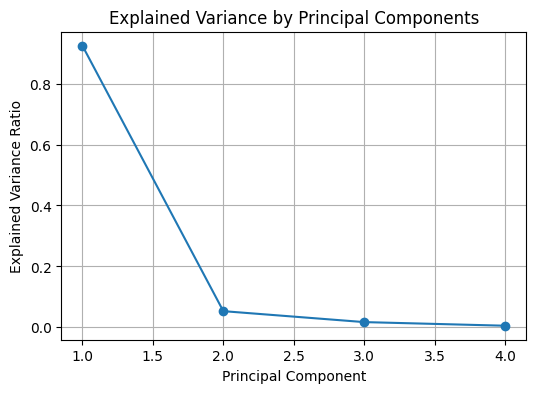

In [2]:
explained_variance = eig_vals / eig_vals.sum()

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.savefig("results/pca_variance.png")

### This shows two principle components.

Minimum at x = 2.2500, f(x) = -6.5430


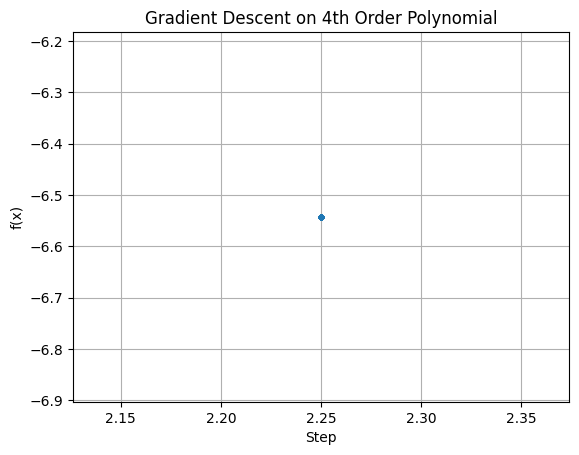

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 4th degree polynomial: f(x) = x^4 - 3x^3 + 2
def f(x):
    return x**4 - 3 * x**3 + 2

def grad_f(x):
    return 4 * x**3 - 9 * x**2

x = 5.0 
lr = 0.01
xs, fs = [], []

for i in range(100):
    x -= lr * grad_f(x)
    xs.append(x)
    fs.append(f(x))

print(f"Minimum at x = {x:.4f}, f(x) = {f(x):.4f}")

plt.plot(xs, fs, marker='o', markersize=3)
plt.title("Gradient Descent on 4th Order Polynomial")
plt.xlabel("Step")
plt.ylabel("f(x)")
plt.grid(True)
plt.savefig("results/gd_polynomial.png")


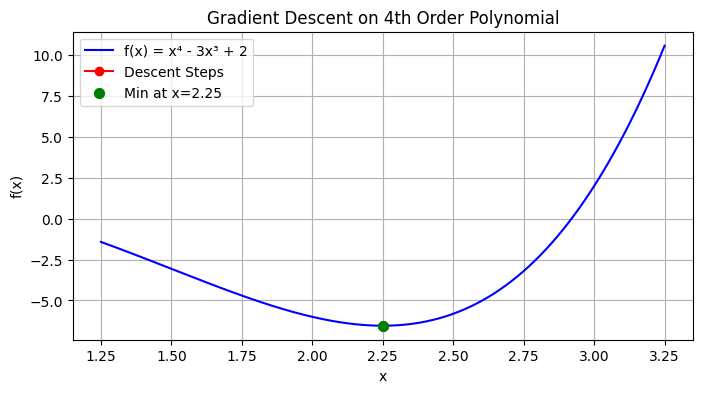

In [4]:
x_vals = np.linspace(min(xs)-1, max(xs)+1, 200)
plt.figure(figsize=(8, 4))
plt.plot(x_vals, f(x_vals), label="f(x) = x⁴ - 3x³ + 2", color="blue")
plt.plot(xs, fs, marker='o', color='red', label="Descent Steps")
plt.scatter(x, f(x), color='green', s=50, zorder=5, label=f"Min at x={x:.2f}")
plt.legend()
plt.title("Gradient Descent on 4th Order Polynomial")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.savefig("results/gd_poly_detailed.png")


In [7]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.array([[0, 1], [1, 0], [1, 1]])
y = np.array([[1], [1], [0]])

np.random.seed(42)
W1 = np.random.randn(2, 3)
W2 = np.random.randn(3, 1)

lr = 0.1

Epoch 0, Loss: 0.2521
Epoch 100, Loss: 0.2222
Epoch 200, Loss: 0.2085
Epoch 300, Loss: 0.1954
Epoch 400, Loss: 0.1834
Epoch 500, Loss: 0.1723
Epoch 600, Loss: 0.1618
Epoch 700, Loss: 0.1512
Epoch 800, Loss: 0.1402
Epoch 900, Loss: 0.1283


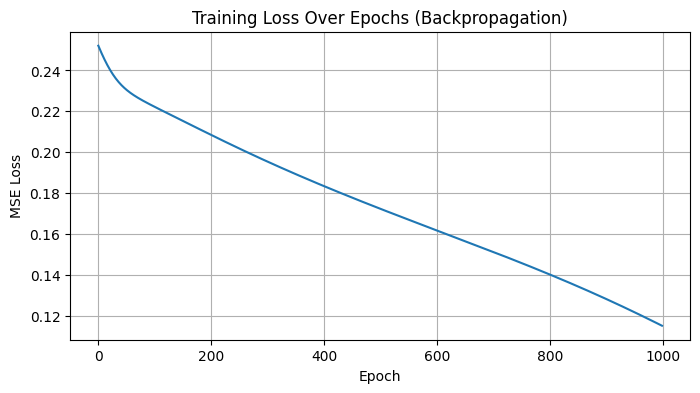

In [8]:
losses = []
for epoch in range(1000):
    z1 = X @ W1
    a1 = sigmoid(z1)
    z2 = a1 @ W2
    a2 = sigmoid(z2)

    loss = ((a2 - y) ** 2).mean()
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    # Main Backpropagation steps
    d_a2 = 2 * (a2 - y)
    d_z2 = d_a2 * sigmoid_deriv(z2)
    d_W2 = a1.T @ d_z2

    d_a1 = d_z2 @ W2.T
    d_z1 = d_a1 * sigmoid_deriv(z1)
    d_W1 = X.T @ d_z1

    W2 -= lr * d_W2
    W1 -= lr * d_W1

plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Over Epochs (Backpropagation)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.savefig("results/backprop_loss_curve.png")


# Report: Backpropagation and Gradient Descent

### Function: f(x) = x^4 - 3x^3 + 2
- Derivative: f'(x) = 4x^3 - 9x^2
- Minima found via gradient descent ~ x = 2.25

### Neural Net:
- 2 input → 3 hidden → 1 output
- Activation: Sigmoid

### Backward Pass:
- Output Layer: dL/dW2 = a1.T @ d_z2, where d_z2 = (a2 - y) * sigmoid'(z2)
- Hidden Layer: dL/dW1 = X.T @ d_z1, where d_z1 = d_a1 * sigmoid'(z1)

All gradients are derived manually and verified in code.